In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("HousingData_Clean.csv",index_col=0)

In [3]:
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [5]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
model= RandomForestRegressor(n_estimators=11,max_depth=4,random_state=42)
#n_estimators kaç karar ağacı oluşsun genelde tekil yapılır
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=11, random_state=42)

In [8]:
y_pred=model.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [11]:
mae, mse, r2

(2.613283008123686, 15.182379430216919, 0.7962454879305249)

In [12]:
# CV -> Cross Validation
# GridSearchCV
param_grid= {
    "n_estimators":list(range(5,25)),
    "max_depth":list(range(4,14))
}

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
grid = GridSearchCV( RandomForestRegressor(), param_grid, scoring="r2" )
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                          16, 17, 18, 19, 20, 21, 22, 23, 24]},
             scoring='r2')

In [16]:
grid.best_params_, grid.best_score_

({'max_depth': 6, 'n_estimators': 11}, np.float64(0.8116081142351532))

In [19]:
from sklearn.tree import plot_tree 
import matplotlib.pyplot as plt

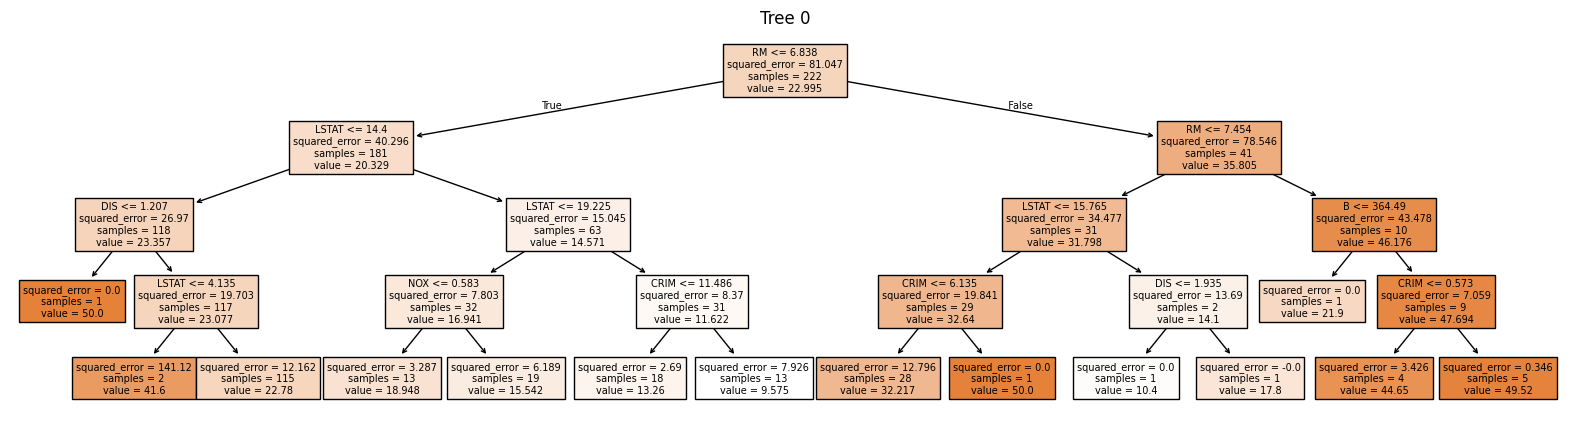

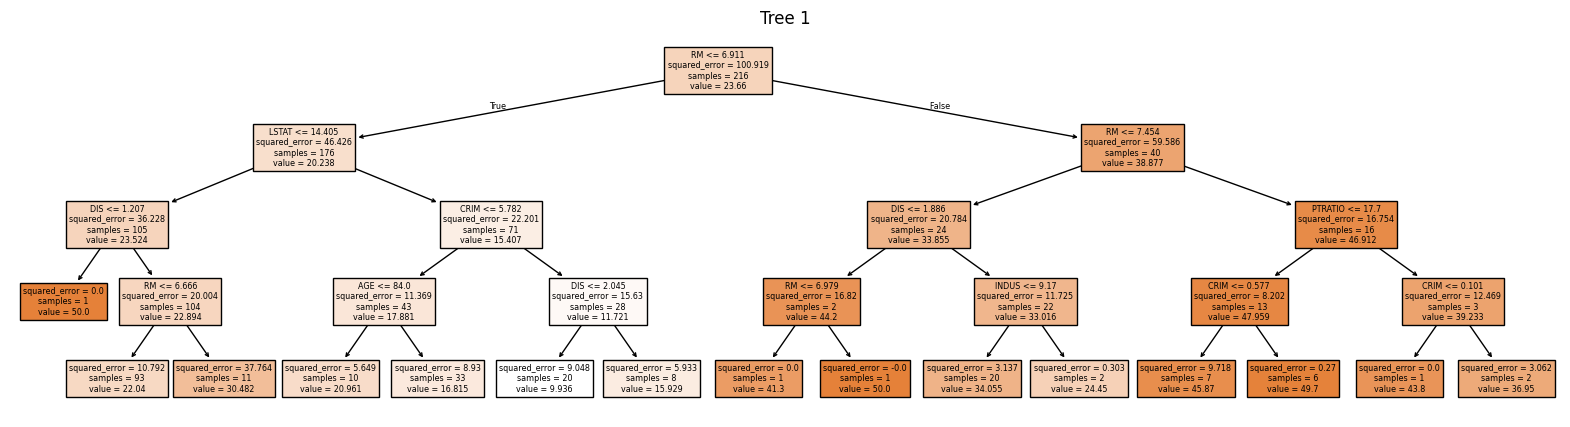

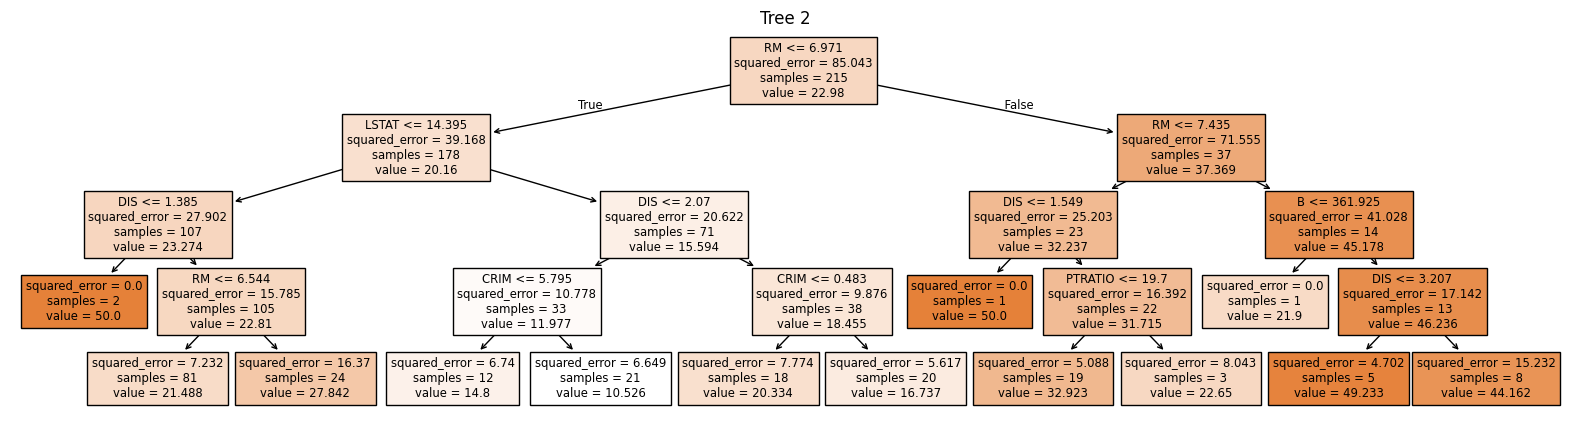

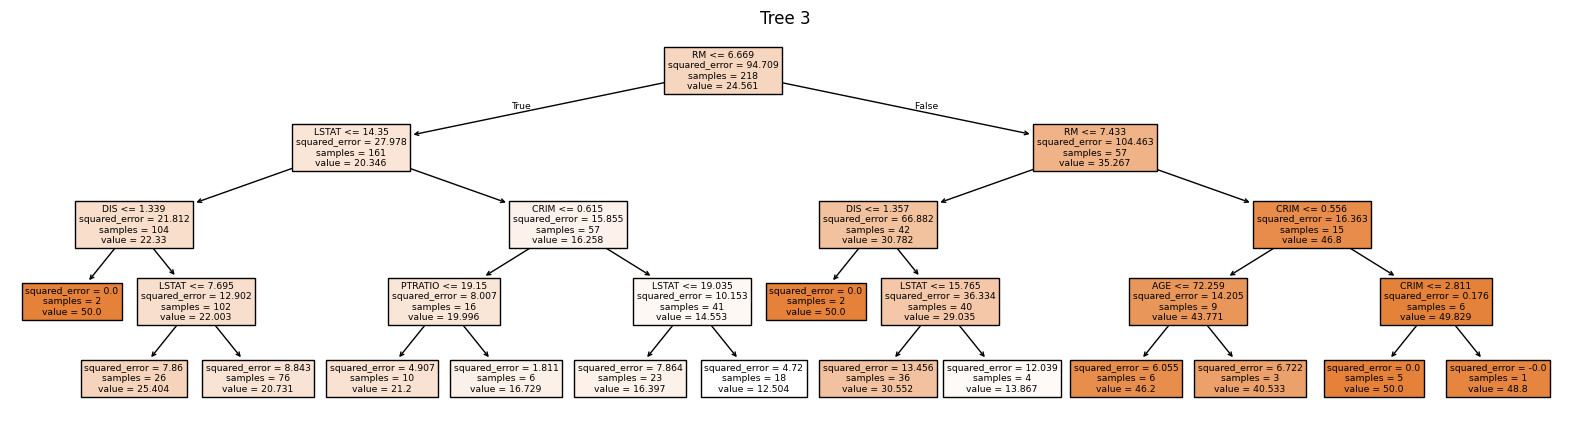

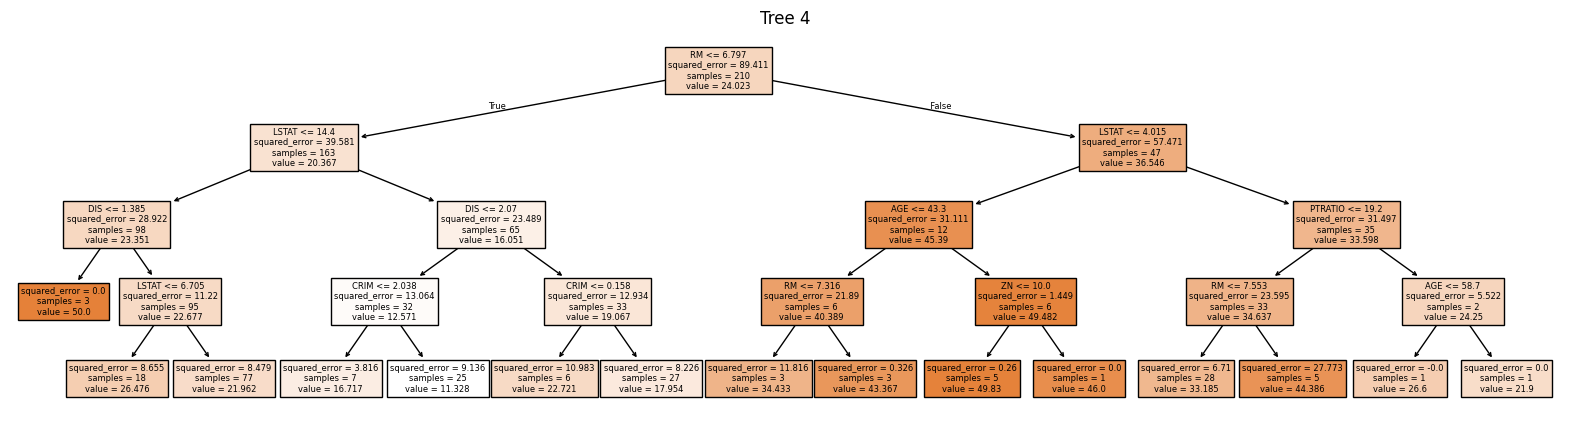

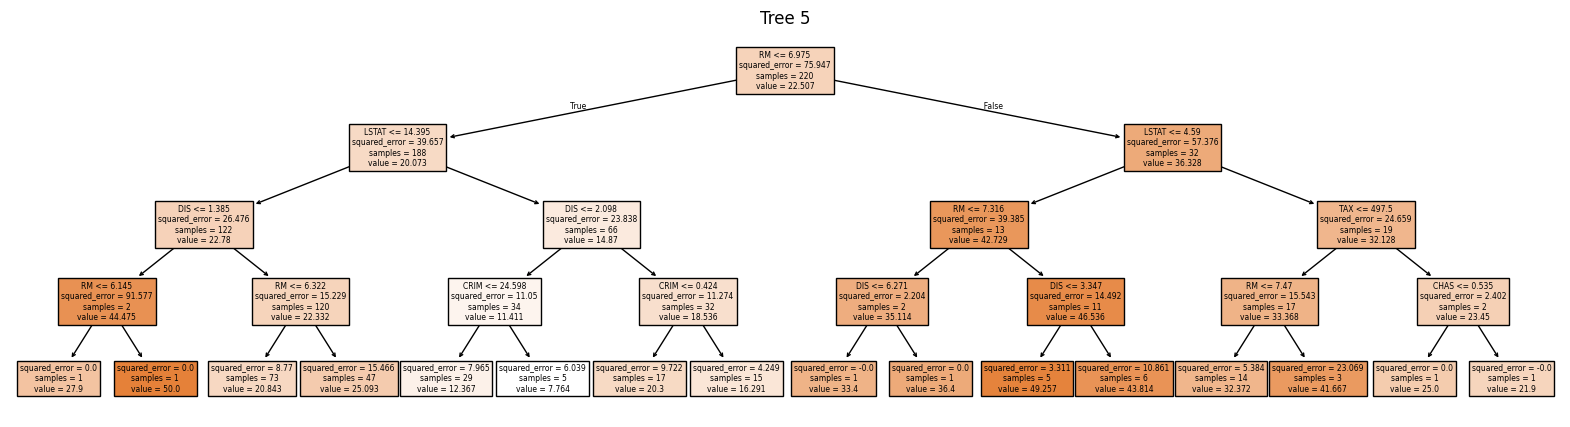

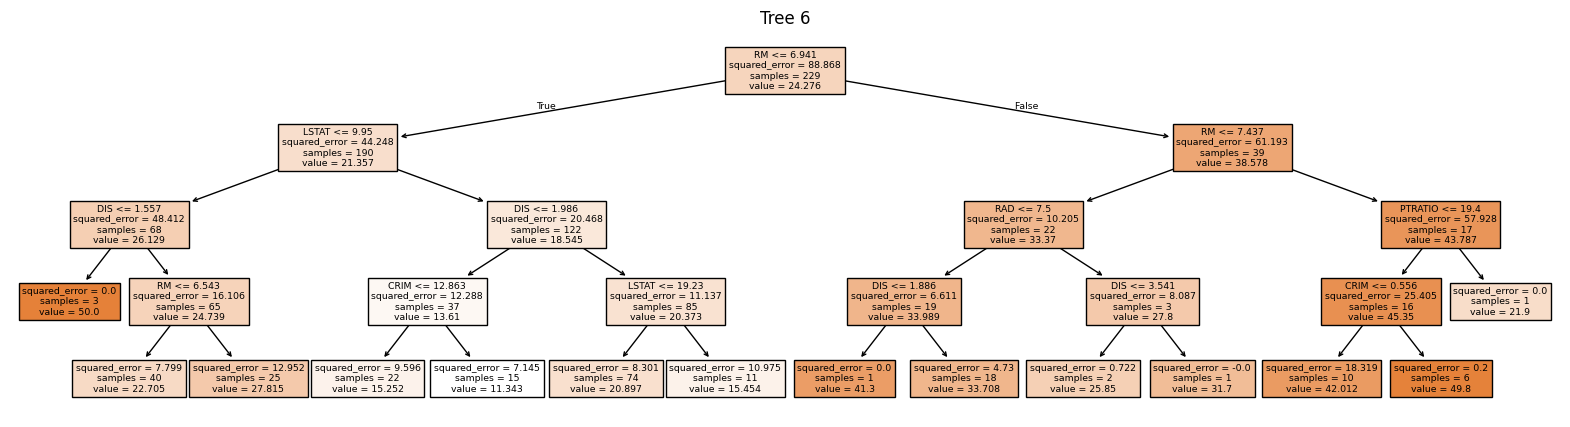

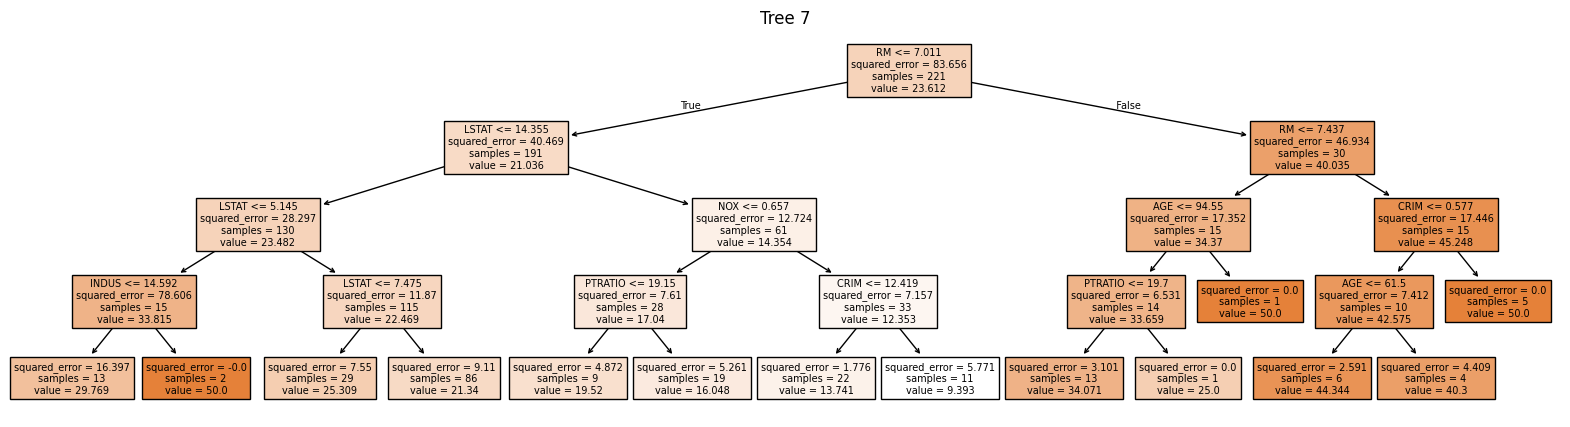

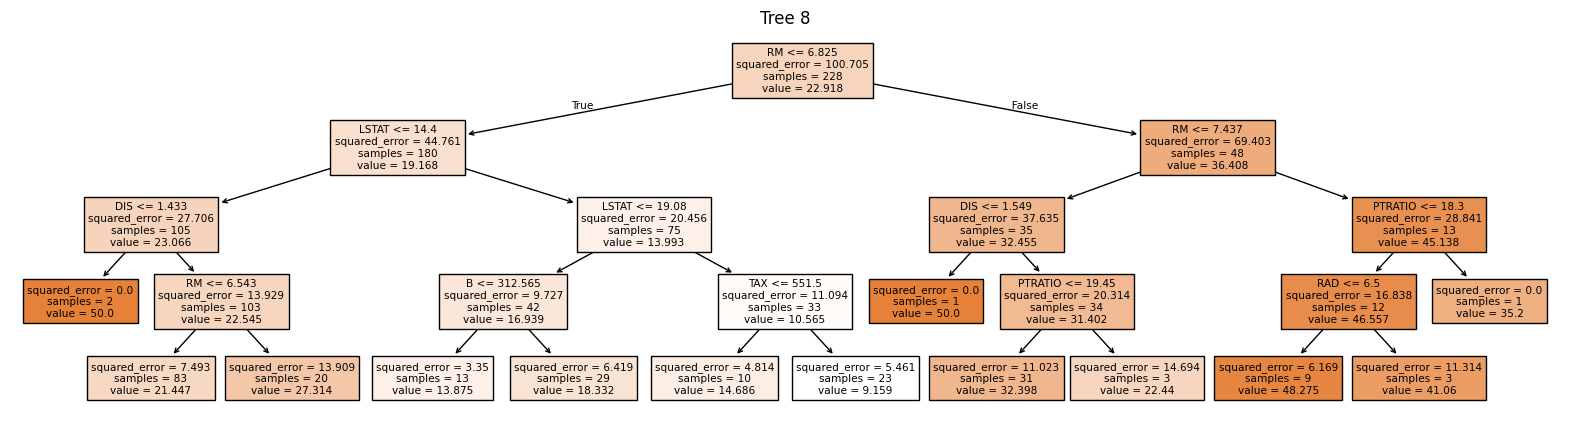

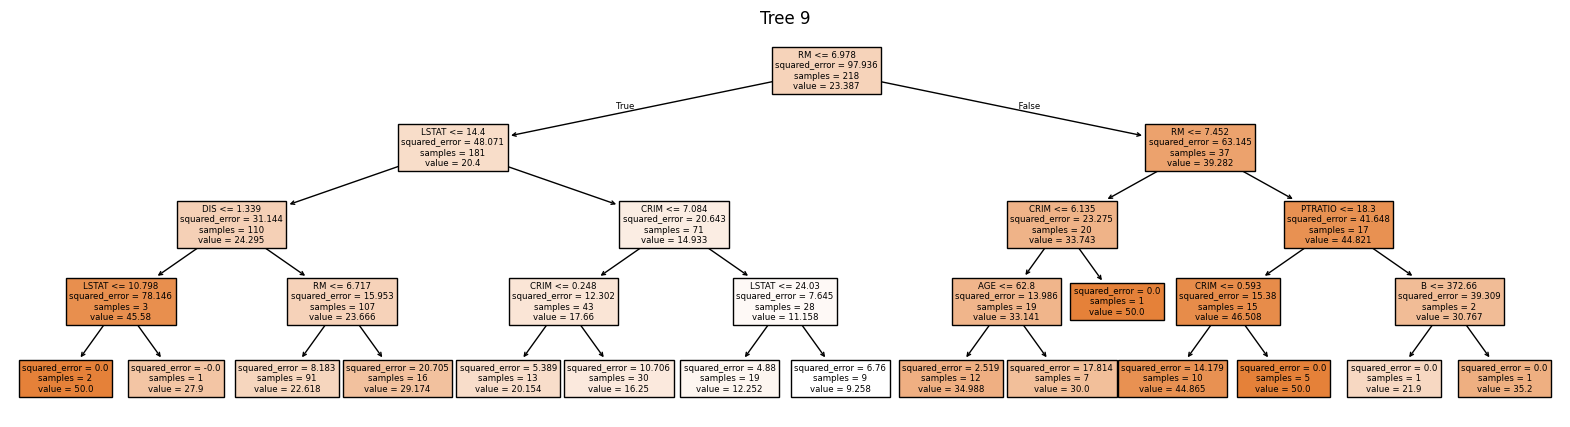

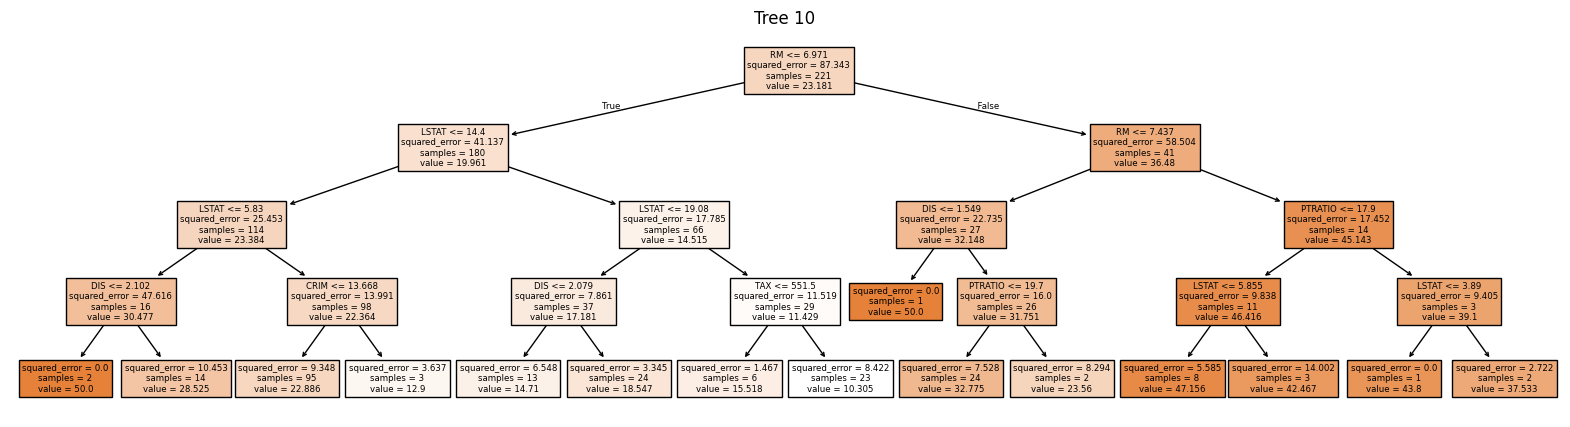

In [25]:
for idx, tree in enumerate(model.estimators_):
    plt.figure(figsize=(20, 5))
    plot_tree(tree,
              feature_names=X.columns,
              filled=True)
    plt.title(f"Tree {idx}")  # Ağacın kaçıncı olduğunu yazıyoruz
    plt.show()